# California Housing - Exploratory Data Analysis

**DATA 4950 Week 4 Demo**

## What we will Cover
1. Load and inspect the data
2. Check data quality
3. Analyze target variable
4. Explore feature distribution
5. Find correlations
6. Geographic patterns
   

In [5]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All packages working!")



All packages working!


## 1. Load the Data

In [3]:
## load California Housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)
df = housing.frame
df



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
## rename target variable to be clearner


df = df.rename(columns={'MedHouseVal':'median_house_value'})
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
## convert to actual dolloars (original is in $100,000 units)

df['median_house_value'] = df['median_house_value']*100000
df



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [9]:
## check data quality

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# data shape

df.shape


(20640, 9)

In [11]:
# print data shape

print(f'Data loaded: {df.shape[0]:,} rows x {df.shape[1]:,} columns')


Data loaded: 20,640 rows x 9 columns


In [12]:
## first 5 rows by default

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [13]:
## first 7 rows 

df.head(7)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,269700.0
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,299200.0


In [14]:
## last 5 rows

df.tail()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,89400.0


In [15]:
## random 4 rows

df.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
4608,3.4812,52.0,4.520690,1.068966,707.0,2.437931,34.06,-118.34,432800.0
9717,2.7321,28.0,5.043269,1.129808,705.0,3.389423,36.85,-121.79,150000.0
19560,1.2857,39.0,4.031496,1.039370,443.0,3.488189,37.61,-120.99,60000.0
2232,2.8274,12.0,4.768293,1.012195,292.0,1.780488,36.85,-119.78,79500.0


## 2. Data Quality Check

In [16]:
## data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
## data types


df.dtypes


MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
median_house_value    float64
dtype: object

In [18]:
## check missing values

print(f'Missing values: {df.isnull().sum().sum()}')

Missing values: 0


In [19]:
## check if duplicate rows

print(f'Duplicate rows: {df.duplicated().sum()}')


Duplicate rows: 0


In [20]:
# summary statistics

df.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


## 3. Target Variable Analysis

Our target is 'median_house_values' - what we want to predict.

<Axes: >

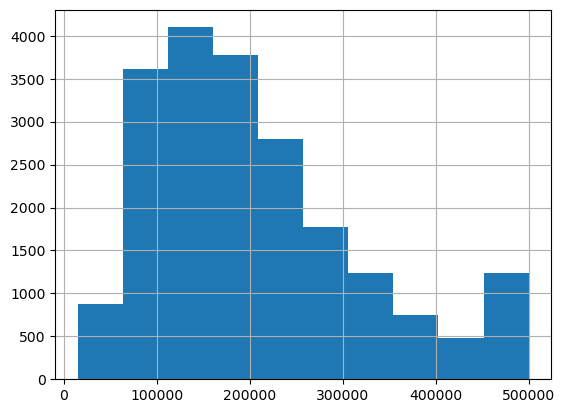

In [21]:
## histogram plot of target variable

df['median_house_value'].hist()


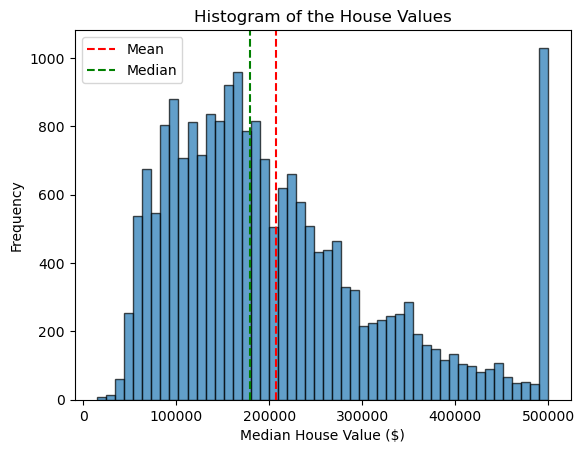

In [22]:
plt.plot(figsize=(6,4))
plt.hist(df['median_house_value'], bins=50, edgecolor='black',alpha=0.7)
plt.axvline(df['median_house_value'].mean(),color='red',linestyle='--',label='Mean')
plt.axvline(df['median_house_value'].median(),color='green',linestyle='--',label='Median')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.title('Histogram of the House Values')
plt.legend()
plt.show()

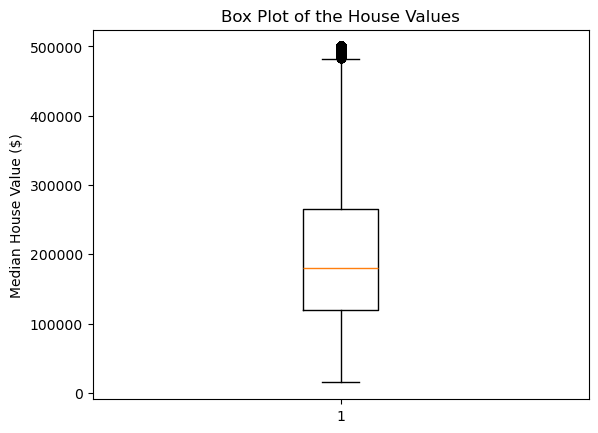

In [24]:
# boxplot of target variable

plt.plot(figsize=(6,4))
plt.boxplot(df['median_house_value'])
plt.ylabel('Median House Value ($)')
plt.title('Box Plot of the House Values')
plt.show()

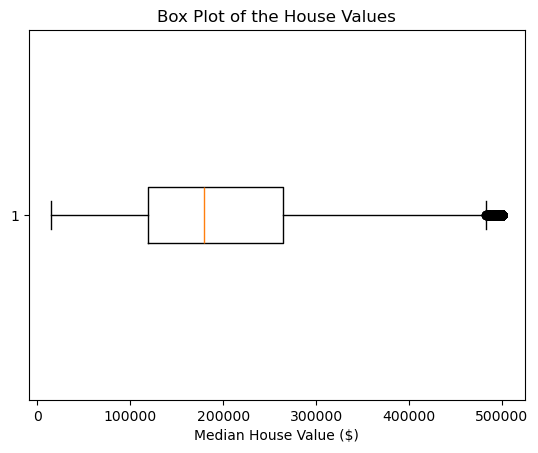

In [25]:
# boxplot of target variable
plt.plot(figsize=(6,4))
plt.boxplot(df['median_house_value'], vert=False)
plt.xlabel('Median House Value ($)')
plt.title('Box Plot of the House Values')
plt.show()

In [27]:
# check the capping issue

max_value = df['median_house_value'].max()
capped = (df['median_house_value']>=500000).sum()

pct = capped/len(df)*100

print(f'Maximum value: ${max_value:,.0f}')
print(f'Values at/near cap: {capped:,} ({pct:.1f}%)')

Maximum value: $500,001
Values at/near cap: 992 (4.8%)


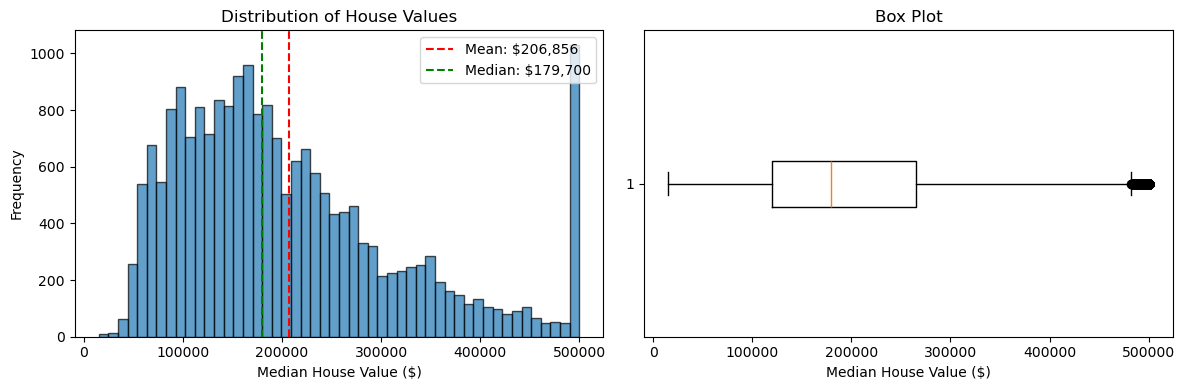

In [28]:
# target distribution subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# histogram
axes[0].hist(df['median_house_value'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['median_house_value'].mean(), color='red', linestyle='--', label=f"Mean: ${df['median_house_value'].mean():,.0f}")
axes[0].axvline(df['median_house_value'].median(), color='green', linestyle='--', label=f"Median: ${df['median_house_value'].median():,.0f}")
axes[0].set_xlabel('Median House Value ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Values')
axes[0].legend()

# box plot
axes[1].boxplot(df['median_house_value'], vert=False)
axes[1].set_xlabel('Median House Value ($)')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.show()

## 4. Visualize All Features

In [30]:
# get feature names
features = df.columns
features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value'],
      dtype='object')

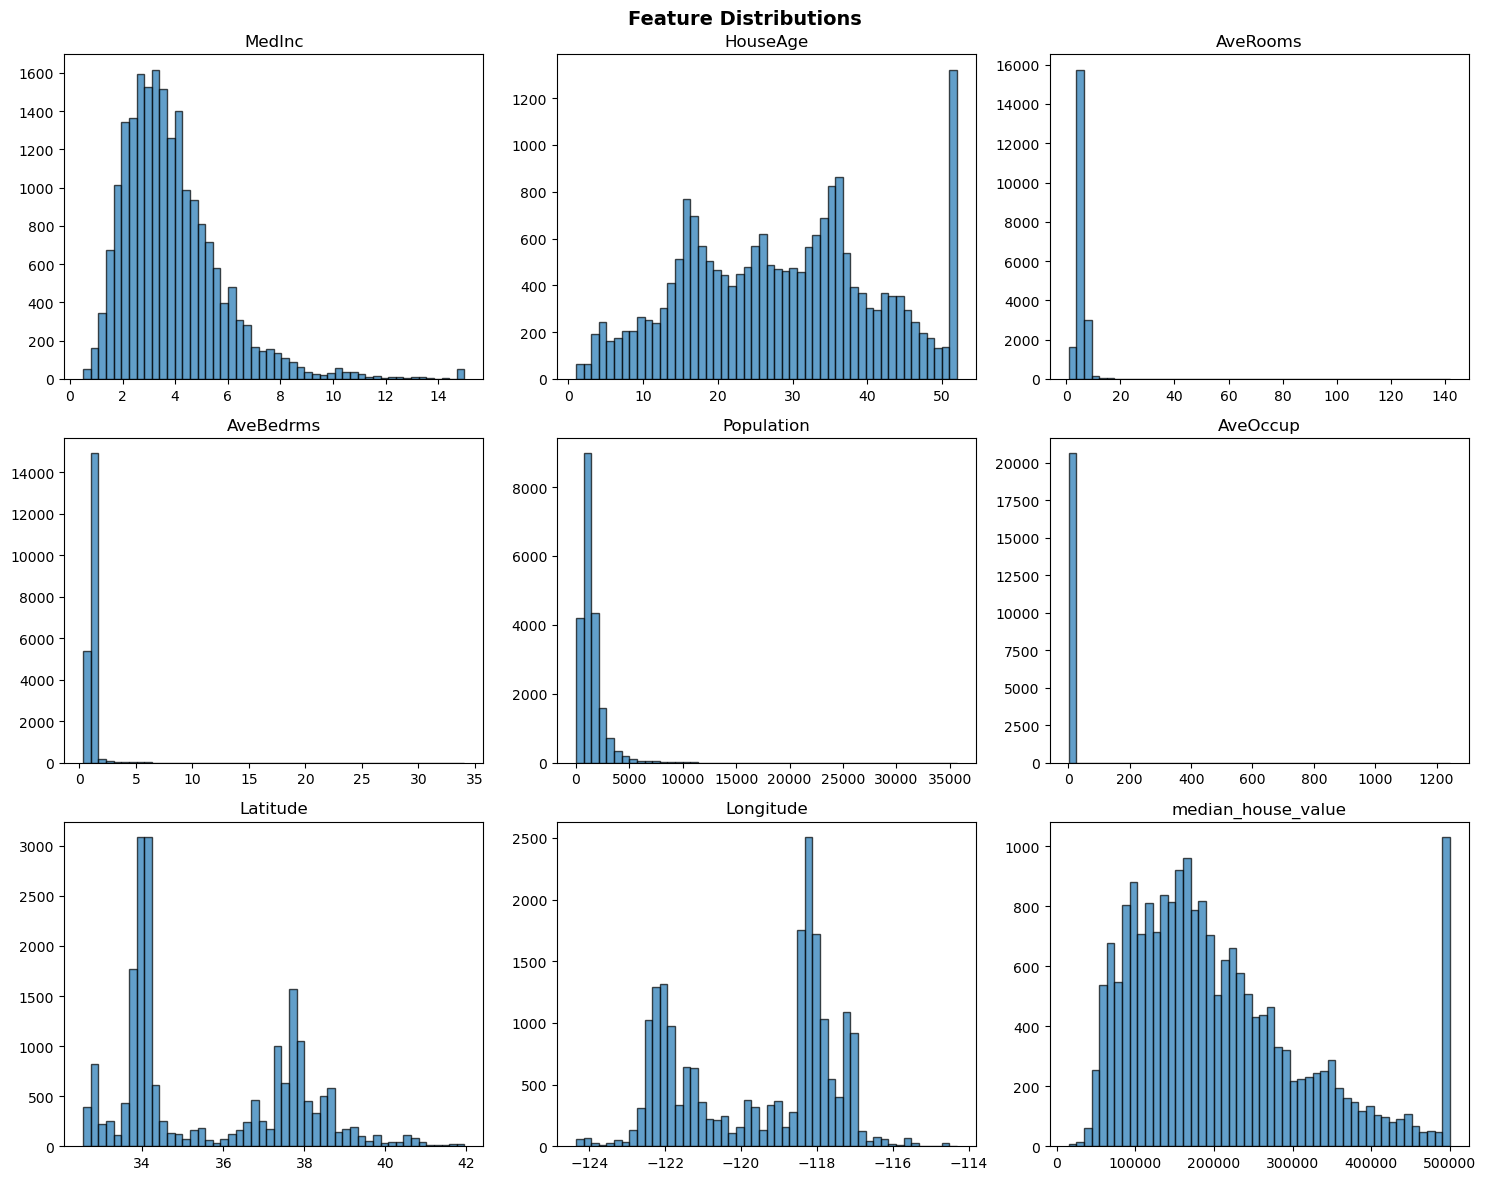

In [31]:
# histograms for all features
fig,axes = plt.subplots(3,3,figsize=(15,12))
axes = axes.flatten()

for i,col in enumerate(features):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.suptitle('Feature Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

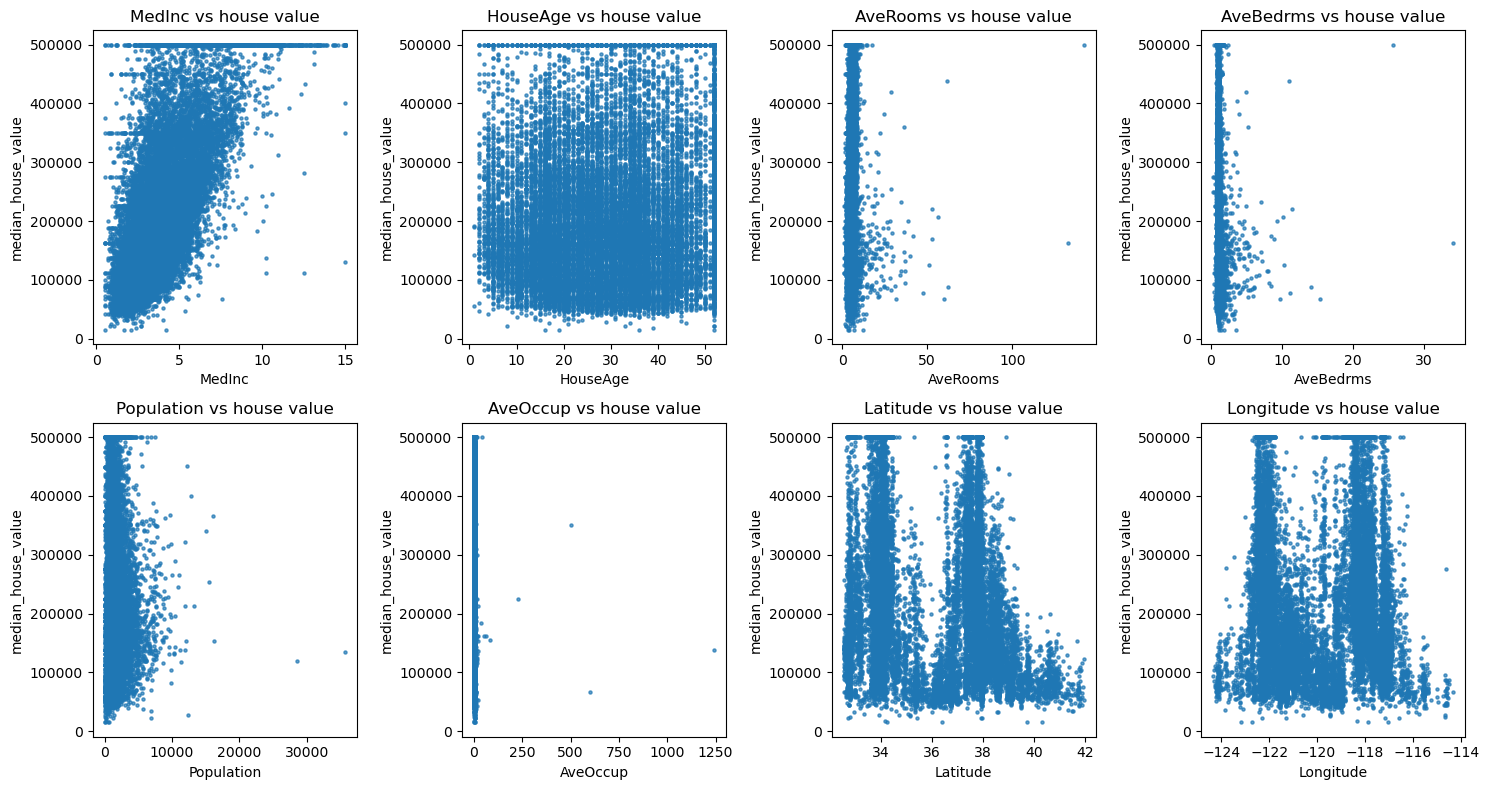

In [37]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

# Scatter Plots (Features vs Target)
fig,axes = plt.subplots(2,4,figsize=(15,8))
axes = axes.flatten()

for i,feature in enumerate(features):
    
    ## TODO: add scatter plot feature vs target variable
    axes[i].scatter(df[feature],df['median_house_value'], s=5, alpha=0.7)
    axes[i].set_title(f'{feature} vs house value')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('median_house_value')


plt.tight_layout()
plt.show()

In [38]:
# Calculate correlation matrix

correlation_matrix = df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


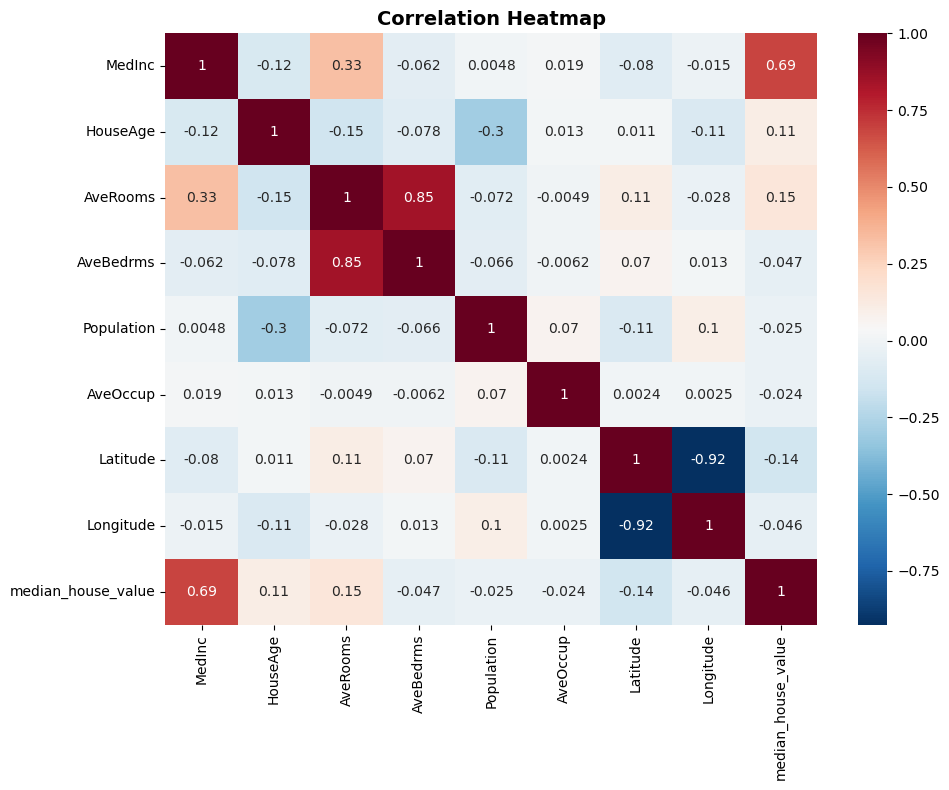

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r') # fmt='.2f'
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [40]:
correlation_matrix['median_house_value']

MedInc                0.688075
HouseAge              0.105623
AveRooms              0.151948
AveBedrms            -0.046701
Population           -0.024650
AveOccup             -0.023737
Latitude             -0.144160
Longitude            -0.045967
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [42]:
# Show correlations with target in ascending order
print("Correlations with Median House Value:")

correlation_matrix['median_house_value'].sort_values(ascending=True)



Correlations with Median House Value:


Latitude             -0.144160
AveBedrms            -0.046701
Longitude            -0.045967
Population           -0.024650
AveOccup             -0.023737
HouseAge              0.105623
AveRooms              0.151948
MedInc                0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

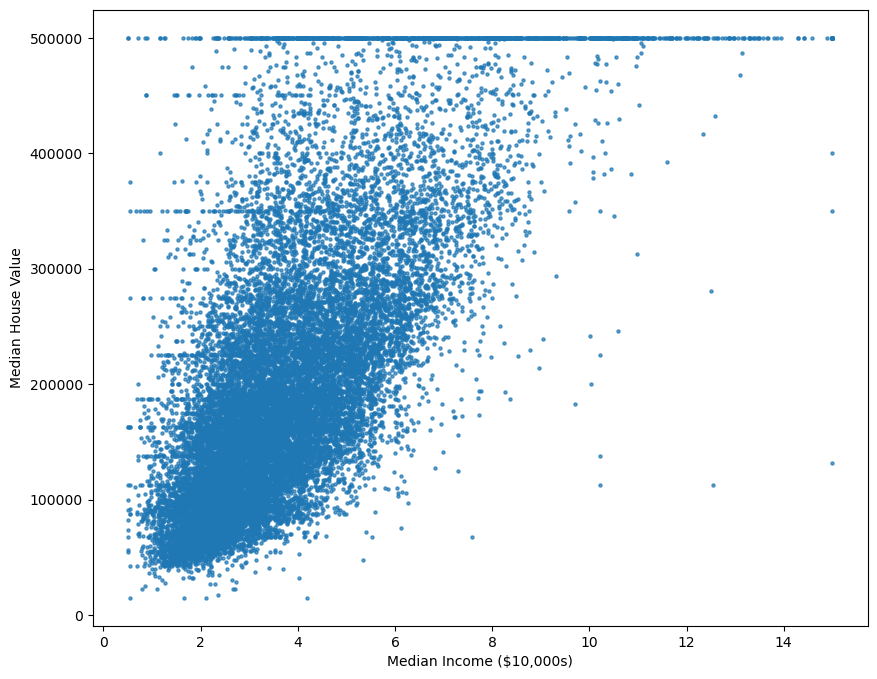

In [46]:
# Income vs House value plot

plt.figure(figsize=(10,8))
plt.scatter(df['MedInc'],df['median_house_value'],s=5,alpha=0.7)
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Median House Value')
plt.show()

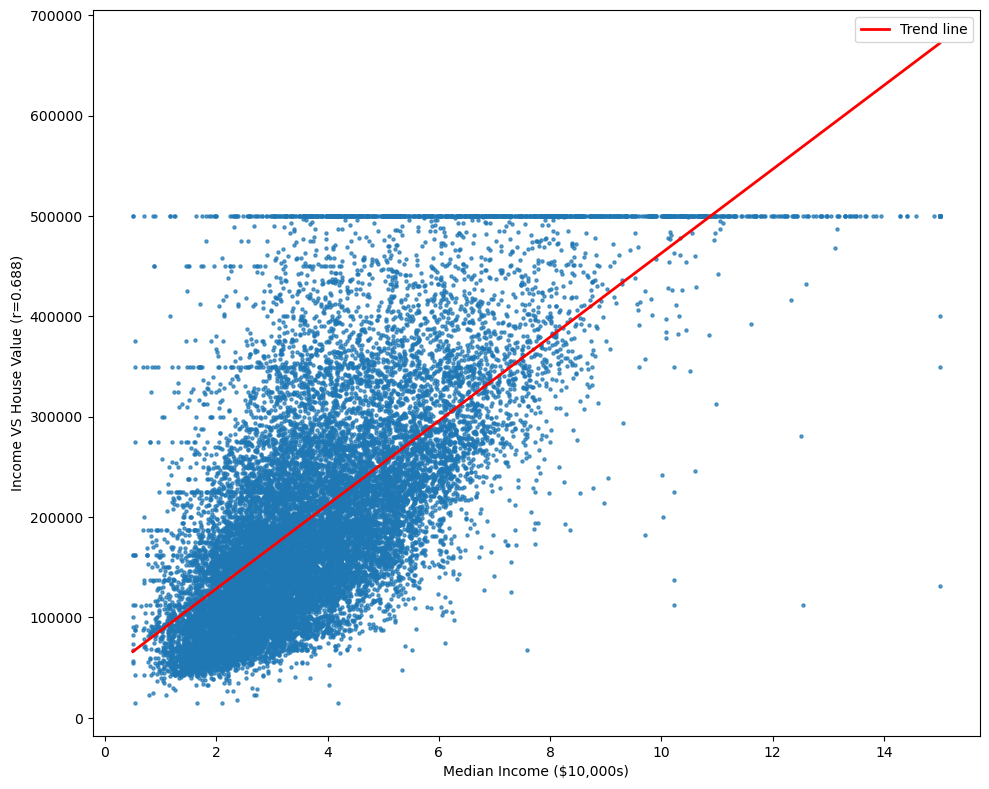

In [49]:
# Income vs House value
plt.figure(figsize=(10,8))
plt.scatter(df['MedInc'], df['median_house_value'], alpha=0.7, s=5)
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Income VS House Value (r=0.688)')

## add trend line
z = np.polyfit(df['MedInc'], df['median_house_value'],1)
p = np.poly1d(z)
x_line = np.linspace(df['MedInc'].min(), df['MedInc'].max(), 100)
plt.plot(x_line,p(x_line), linewidth=2, label='Trend line', color='red')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Identify Outliers

In [50]:
# Function to count outliers using IQR method

def count_outlier(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return len(outliers)

In [52]:
## compute outlier percentage for each feature

for col in df.columns:
    n_outliers = count_outlier(col)
    percent = (n_outliers/len(df))*100
    print(f'{col}: {n_outliers} outliers ({percent: .2f}%)')


MedInc: 681 outliers ( 3.30%)
HouseAge: 0 outliers ( 0.00%)
AveRooms: 511 outliers ( 2.48%)
AveBedrms: 1424 outliers ( 6.90%)
Population: 1196 outliers ( 5.79%)
AveOccup: 711 outliers ( 3.44%)
Latitude: 0 outliers ( 0.00%)
Longitude: 0 outliers ( 0.00%)
median_house_value: 1071 outliers ( 5.19%)


## 7. Geographic Plot

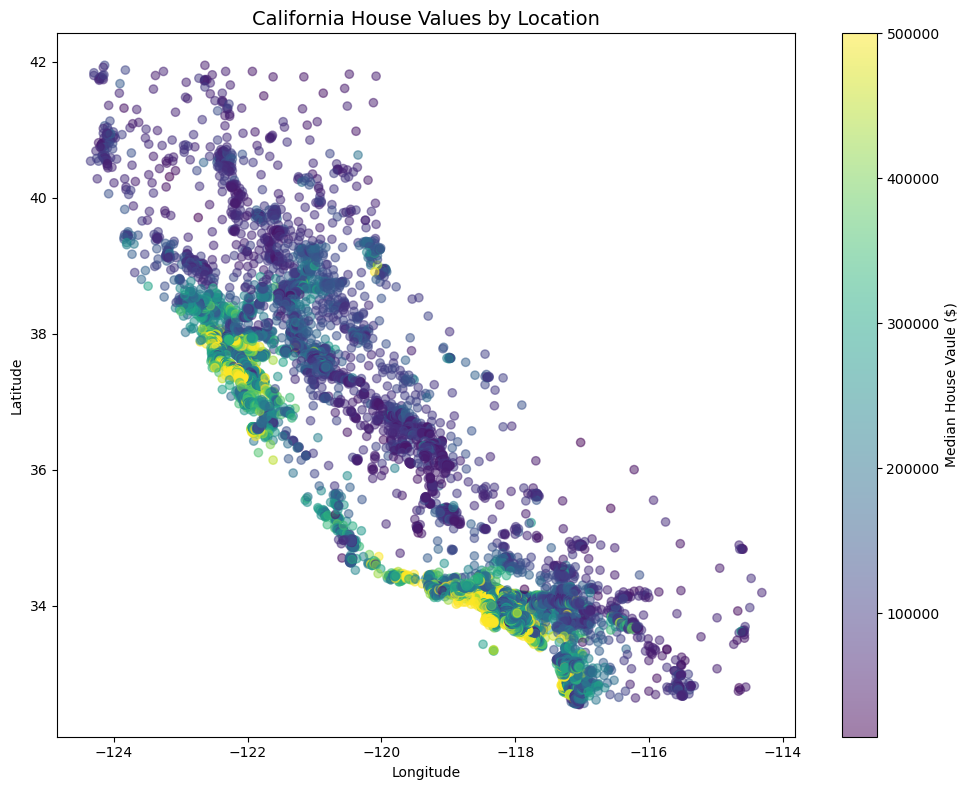

In [56]:
# geographic visualization
plt.figure(figsize=(10,8))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                      c=df['median_house_value'], alpha=0.5, cmap='viridis')

plt.colorbar(scatter, label='Median House Vaule ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California House Values by Location',fontsize=14)

plt.tight_layout()
plt.show()

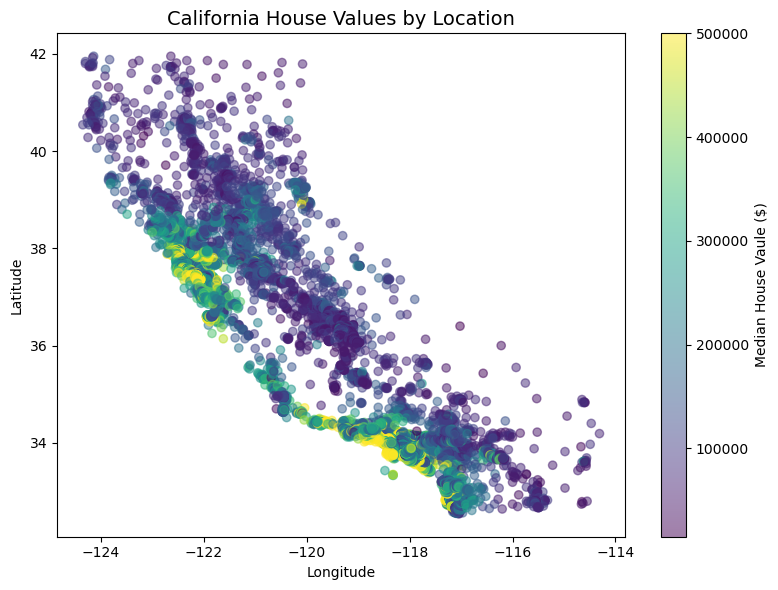

In [54]:
# geographic visualization
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                      c=df['median_house_value'], alpha=0.5, cmap='viridis')

plt.colorbar(scatter, label='Median House Vaule ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California House Values by Location',fontsize=14)

plt.tight_layout()
plt.show()

## 8. Key Finding Summary

1. **Dataset:** 20,640 rows and 9 columns, no missing values, no duplicated samples
2. **Target(median_house_value):** slightly right-skewed, data cap at $500k
3. **Strong Predictor:** (correlation r=0.69)
4. **Outliers:** AveOccup, AveRooms and populations have significant outliers
5. **Geographic Patterns:** Coast area associated with more expensive houses




## Next Step

- Preprocessing ()
- deal with outliers, multicollinearity

---
## Save Data for Next Notebook

In [57]:
# Save to CSV
df.to_csv('../data/raw/california_housing.csv', index=False)
print("Data saved to data/raw/california_housing.csv")

Data saved to data/raw/california_housing.csv
